<a href="https://colab.research.google.com/github/TheSpaceMan915/Artificial-Intelligence/blob/main/Lab12_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №12  Колычев Никита  ВПР34**

In [ ]:
#@title Imports
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# **Functions**

In [ ]:
def delete_corrupted_images(path_directory):
  number_bad_images = 0
  for file_name in os.listdir(path_directory):
    try:
      img = Image.open(path_directory + file_name)
      img.verify()
    except (IOError, SyntaxError) as e:
      print("bad file", file_name)
      number_bad_images += 1
      os.remove(path_directory + file_name)
  print("number of bad images:", number_bad_images)      

In [ ]:
def plot_history(history_model):
  fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(14,5))
  plt.rcParams.update({"font.size": 14, "font.family": "serif"})
  
  axes1.plot(history_model.history["accuracy"], label="accuracy")
  axes1.plot(history_model.history["val_accuracy"], label="val_accuracy")
  axes1.set(title="Model accuracy")
  axes1.set(xlabel="Epoch")
  axes1.set(ylabel="Accuracy")
  axes1.legend(loc=4)

  axes2.plot(history_model.history["loss"], label="loss")
  axes2.plot(history_model.history["val_loss"], label="val_loss")
  axes2.set(title="Model loss")
  axes2.set(xlabel="Epoch")
  axes2.set(ylabel="Loss")
  axes2.legend(loc=1)
  fig.tight_layout()

In [ ]:
def show_dataset_images(dataset_images, dataset_labels):
  plt.figure(figsize=(10,10))
  class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataset_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[dataset_labels[i]])

In [ ]:
def show_batchdataset_images(dataset_images):
  plt.figure(figsize=(10,10))
  class_names = dataset_images.class_names

  for images, labels in dataset_images.take(1):
    for i in range(9):
      axes = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

# **Задание 1**
Улучшить показатели точности модели

In [ ]:
HEIGHT_IMAGE = 28
WIDTH_IMAGE = 28
SIZE_BATCH = 32

(images_train, labels_train), (images_validate, labels_validate) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


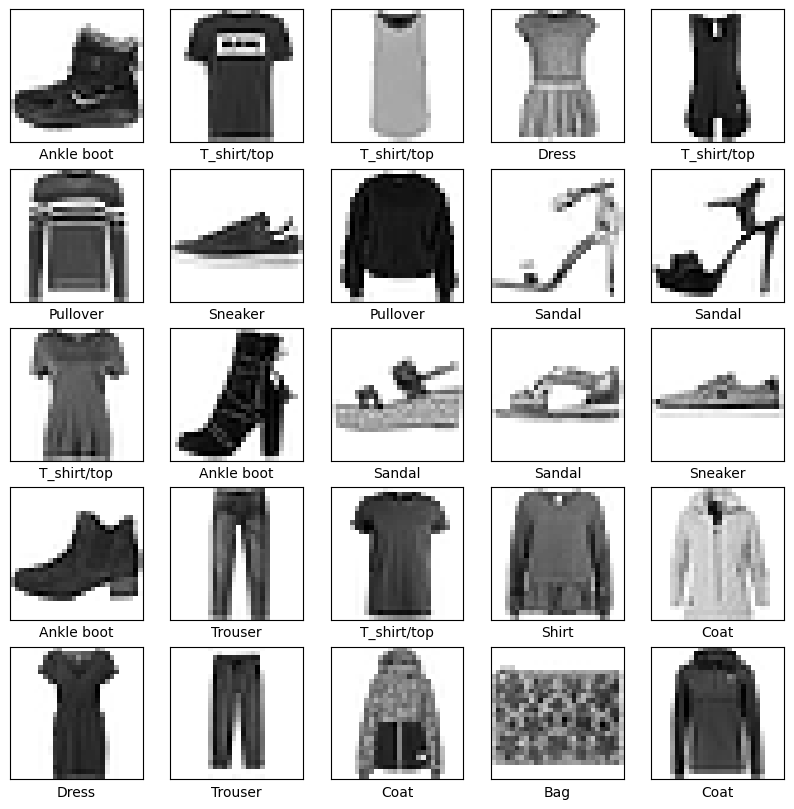

In [ ]:
show_dataset_images(images_train, labels_train)

In [ ]:
# expanding dimentions of the datasets
images_train = images_train.reshape(images_train.shape[0], HEIGHT_IMAGE, WIDTH_IMAGE, 1)
images_validate = images_validate.reshape(images_validate.shape[0], HEIGHT_IMAGE, WIDTH_IMAGE, 1)

labels_train = to_categorical(labels_train)
labels_validate = to_categorical(labels_validate)

In [ ]:
model = Sequential([
    Rescaling(1.0 / 255, input_shape=(HEIGHT_IMAGE, WIDTH_IMAGE, 1)),
    Conv2D(16, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu', kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "mean_absolute_error"])

In [ ]:
history = model.fit(images_train, labels_train, 
                    validation_data=(images_validate, labels_validate), 
                    epochs=10, verbose=1,
                    batch_size = SIZE_BATCH)

Epoch 1/10
1875/1875 [==============================] - 114s 59ms/step - loss: 0.7419 - accuracy: 0.7357 - mean_absolute_error: 0.3713 - val_loss: 0.4831 - val_accuracy: 0.8354 - val_mean_absolute_error: 0.3680
Epoch 2/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.4904 - accuracy: 0.8256 - mean_absolute_error: 0.3477 - val_loss: 0.4127 - val_accuracy: 0.8511 - val_mean_absolute_error: 0.3453
Epoch 3/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.4282 - accuracy: 0.8500 - mean_absolute_error: 0.3437 - val_loss: 0.3842 - val_accuracy: 0.8661 - val_mean_absolute_error: 0.3336
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.3900 - accuracy: 0.8615 - mean_absolute_error: 0.3408 - val_loss: 0.3838 - val_accuracy: 0.8610 - val_mean_absolute_error: 0.3395
Epoch 5/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.3701 - accuracy: 0.8696 - mean_absolute_error: 0.3393 - val_loss: 0.3147 - 

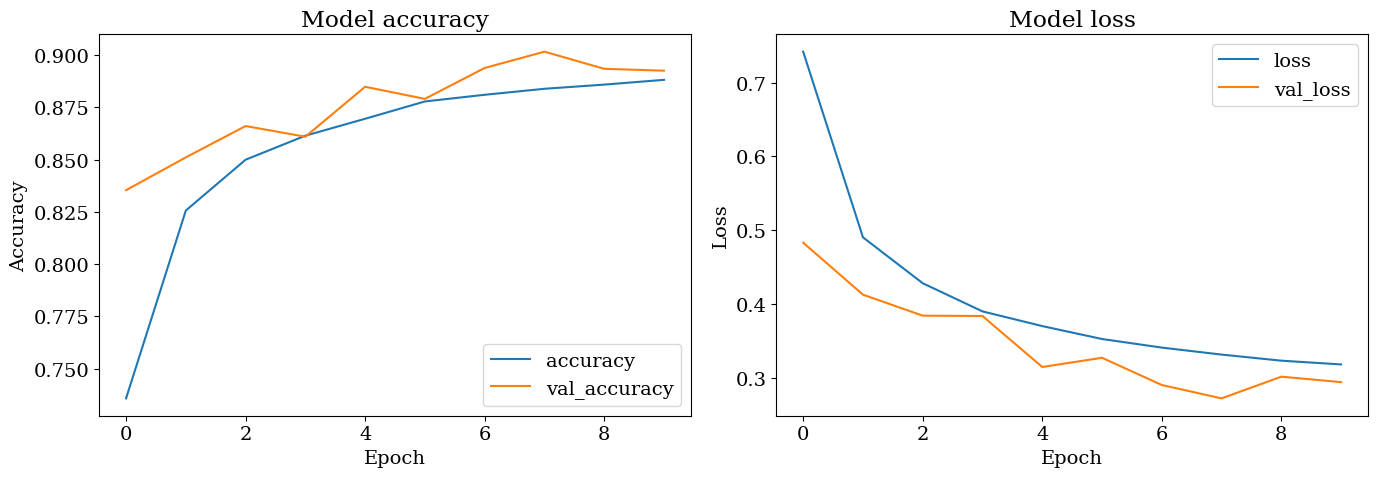

In [ ]:
plot_history(history)

# **Задание 2**
Решите задачу классификации для набора данных "Horses or humans". При необходимости обоснуйте и примените обогащение данных.

In [ ]:
# don't forget to load kaggle.json to the content folder before
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

 97% 297M/307M [00:04<00:00, 37.6MB/s]
100% 307M/307M [00:04<00:00, 69.2MB/s]


In [ ]:
!mkdir datasets
!mv /content/horses-or-humans-dataset.zip  /content/datasets
!unzip -q /content/datasets/horses-or-humans-dataset.zip -d /content/datasets
!rm -rf /content/datasets/horses-or-humans-dataset.zip
!rm -rf /content/datasets/horse-or-human/horse-or-human

In [ ]:
path_folder_train = "/content/datasets/horse-or-human/train/"
path_folder_validation = "/content/datasets/horse-or-human/validation/"
path_folder_train_humans = "/content/datasets/horse-or-human/train/humans/"
path_folder_train_horses = "/content/datasets/horse-or-human/train/horses/"
path_folder_validation_humans = "/content/datasets/horse-or-human/validation/humans/"
path_folder_validation_horses = "/content/datasets/horse-or-human/validation/horses/"

In [ ]:
delete_corrupted_images(path_folder_train_humans)

number of bad images: 0


In [ ]:
delete_corrupted_images(path_folder_train_horses)

number of bad images: 0


In [ ]:
delete_corrupted_images(path_folder_validation_humans)

number of bad images: 0


In [ ]:
delete_corrupted_images(path_folder_validation_horses)

number of bad images: 0


In [ ]:
HEIGHT_IMAGE = 300
WIDTH_IMAGE = 300
SIZE_BATCH = 32

dataset_train = image_dataset_from_directory(path_folder_train, validation_split=0.3,
                                             subset="training", seed=42,
                                             image_size=(HEIGHT_IMAGE, WIDTH_IMAGE), batch_size=SIZE_BATCH,)

dataset_validate = image_dataset_from_directory(path_folder_validation, validation_split=0.3,
                                                subset="validation", seed=42,
                                                image_size=(HEIGHT_IMAGE, WIDTH_IMAGE), batch_size=SIZE_BATCH,)

Found 1027 files belonging to 2 classes.
Using 719 files for training.
Found 256 files belonging to 2 classes.
Using 76 files for validation.


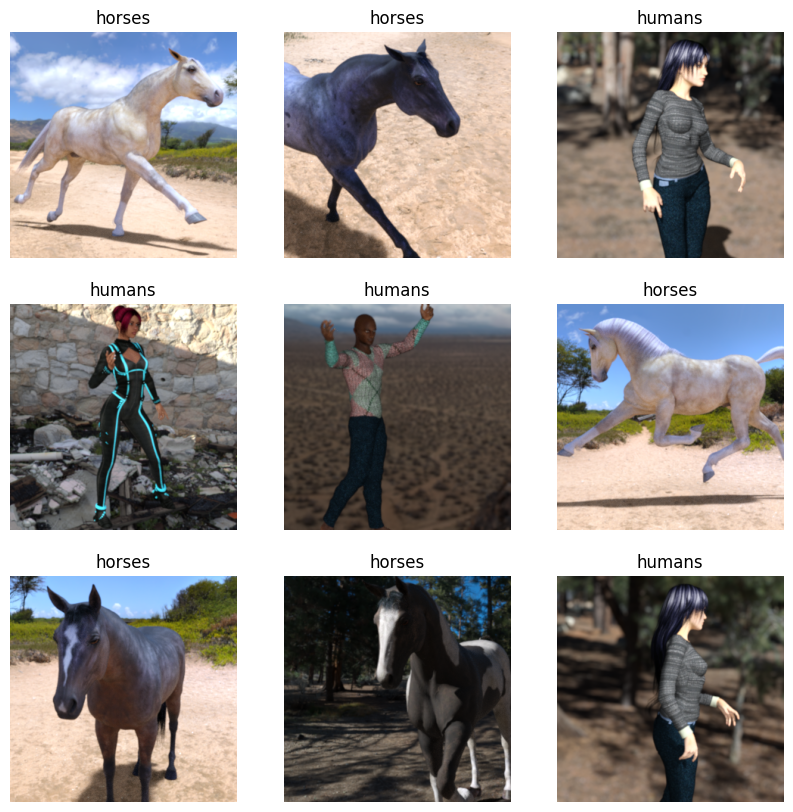

In [ ]:
show_batchdataset_images(dataset_train)

In [ ]:
augmentation_layer = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

model = Sequential([
    Input((HEIGHT_IMAGE, WIDTH_IMAGE, 3)),
    augmentation_layer,
    Rescaling(1.0 / 255),
    Conv2D(16, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu', kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_initializer="he_uniform"),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 300, 300, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 300, 300, 16)      448       
                                                                 
 batch_normalization_30 (Bat  (None, 300, 300, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 150, 150, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)    

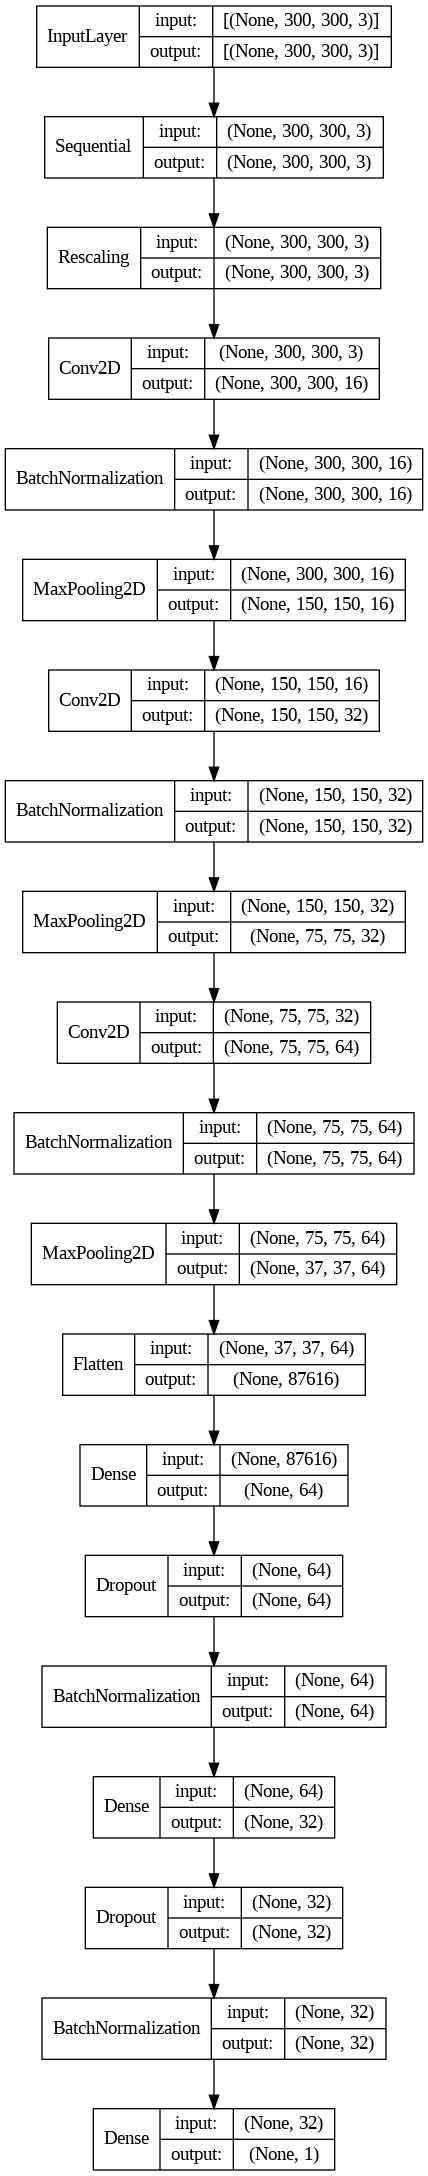

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(dataset_train, validation_data=dataset_validate,
                    epochs=10, verbose=1)

Epoch 1/10
23/23 [==============================] - 142s 6s/step - loss: 0.4551 - accuracy: 0.8039 - val_loss: 1.5648 - val_accuracy: 0.4868
Epoch 2/10
23/23 [==============================] - 137s 6s/step - loss: 0.2482 - accuracy: 0.9124 - val_loss: 1.6805 - val_accuracy: 0.4868
Epoch 3/10
23/23 [==============================] - 136s 6s/step - loss: 0.1643 - accuracy: 0.9680 - val_loss: 0.7998 - val_accuracy: 0.4868
Epoch 4/10
23/23 [==============================] - 132s 6s/step - loss: 0.1214 - accuracy: 0.9722 - val_loss: 0.3302 - val_accuracy: 0.9211
Epoch 5/10
23/23 [==============================] - 131s 6s/step - loss: 0.1082 - accuracy: 0.9750 - val_loss: 0.3473 - val_accuracy: 0.8947
Epoch 6/10
23/23 [==============================] - 142s 6s/step - loss: 0.0840 - accuracy: 0.9819 - val_loss: 0.4701 - val_accuracy: 0.7895
Epoch 7/10
23/23 [==============================] - 130s 6s/step - loss: 0.0672 - accuracy: 0.9861 - val_loss: 0.5061 - val_accuracy: 0.7632
Epoch 8/10
23

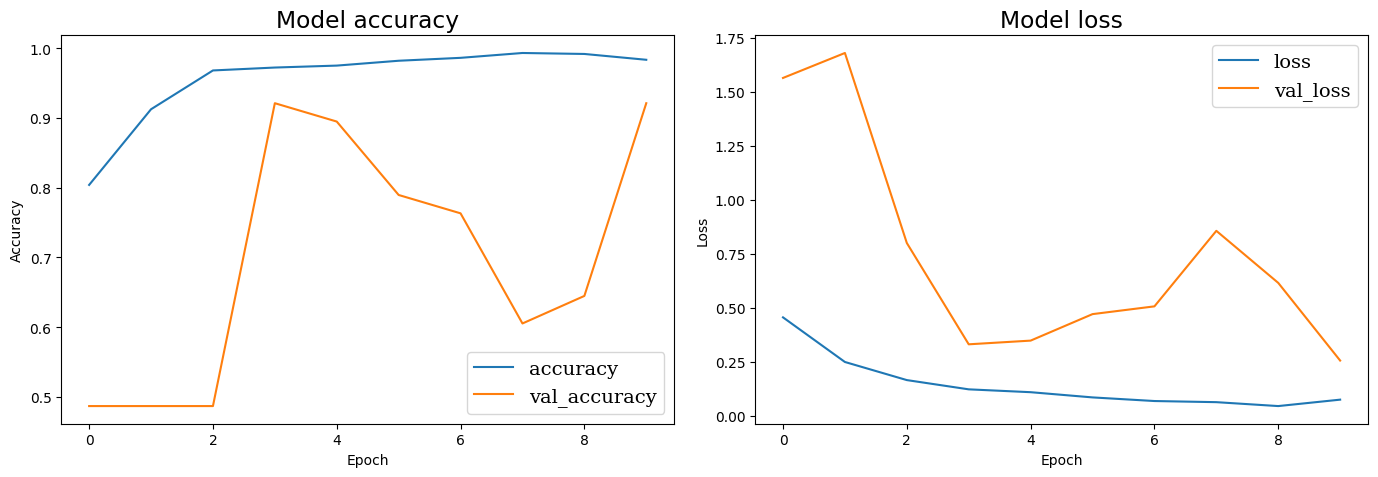

In [ ]:
plot_history(history)